<a href="https://colab.research.google.com/github/kiranraou/Python-Projects/blob/main/Deep%20Learning%20Assignment%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Multi Layer Perceptron on Fashion MNIST Dataset**

Problem Statement

The dataset is MNIST which includes images of certain clothing and accessory.
The objective is to classify images into specific classes using single layer perceptron and multilayer perceptron.

**Dataset**

Total Images - 70,000

Train Images - 60,000

Test Images - 10,000

Image Size - 28 X 28

**Different Classes**

Classes - 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot'


**Importing Modules**

In [ ]:
# Using Tensorflow v1
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential, load_model

from keras.datasets.mnist import load_data
from keras.utils.vis_utils import plot_model
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout, Layer
from keras.utils import to_categorical
from keras.optimizers import Adam, SGD

print('The TensorFlow version being used is:', tf.__version__)

The TensorFlow version being used is: 1.15.2


Using TensorFlow backend.


**Loading the Fashion MNIST dataset from Keras Library**

In [ ]:
fmnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fmnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# Mapping label numbers to actual product name

class_names = ['T-shirt/top', # Index 0
               'Trouser',     # Index 1
               'Pullover',    # Index 2
               'Dress',       # Index 3 
               'Coat',        # Index 4
               'Sandal',      # Index 5
               'Shirt',       # Index 6
               'Sneaker',     # Index 7
               'Bag',         # Index 8
               'Ankle boot']  # Index 9

**Visualizing the Data**

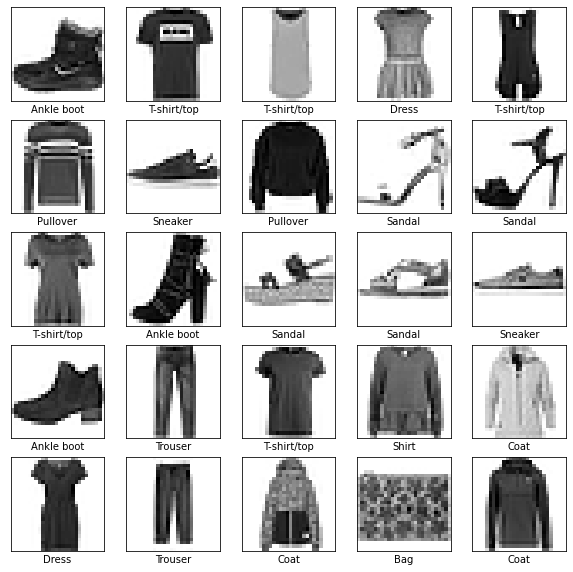

In [ ]:
'''
The Fashion MNIST data labels does not contain 
the actual product name rather the index numbers
Hence, I have defined a variable, class_names that
maps the index numbers to the actual product names.
'''
# First 25 images with labels

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

**Question 1**

*A

* Reshape the input image
* Change the data type to float32
* Normalize the input data



In [ ]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(X_train)))
print("- Validation-set:\t{}".format(len(X_test)))

Size of:
- Training-set:		60000
- Validation-set:	10000


In [ ]:
print('X_train Data Shape:\t{}'.format(X_train.shape))
print('X_test Data Shape:\t{}'.format(X_test.shape))
print('y_train Data Shape:\t{}'.format(y_train.shape))
print('y_test Data Shape:\t{}'.format(y_test.shape))

X_train Data Shape:	(60000, 28, 28)
X_test Data Shape:	(10000, 28, 28)
y_train Data Shape:	(60000,)
y_test Data Shape:	(10000,)


In [ ]:
# Reshaping the array to 4-dims so that it can work with the Keras API
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))
print('Training data dimensions after reshaping:', X_train.shape)

Training data dimensions after reshaping: (60000, 28, 28, 1)


In [ ]:
# Change the type of data to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [ ]:
# Normalizing the RGB codes by dividing it to the max RGB value
X_train = X_train / 255.0
X_test = X_test / 255.0

**Question 1**

*B

* Convert the y_train and y_test to categorical by using keras_to_categorical function
* define num_classes=10

In [ ]:
# Convert labels to categorical one-hot encoding
y_train = to_categorical(y_train, num_classes=10, dtype='float32')
y_test = to_categorical(y_test, num_classes=10, dtype='float32')

**Question 2**

Write a multi layer perceptron using tensorflow for fashion MNIST data to classify all 10 classes. Solve for each questions
Take epoch= 2000

A - Define a function that creates 4 layers using TensorFlow layers

B - Create a function for defining the weights and biases for the 4 layers

C - Call the function
y = multilayer_perceptron(x, weights, biases)

D - Define Cost function and Optimizer
>Cost: tf.nn.softmax_cross_entropy_with_logits

>Optimizer: tf.train.GradientDescentOptimizer

>Initiate the training

In [ ]:
# Re-loading Fashion MNIST Dataset
from tensorflow.examples.tutorials.mnist import input_data
fashion_mnist = input_data.read_data_sets("path/of/fashion-mnist", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting path/of/fashion-mnist/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting path/of/fashion-mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting path/of/fashion-mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting path/of/fashion-mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alter

In [ ]:
# Hyperparameter
learning_rate = 0.001
epochs = 2000
learning_rate_1 = 0.0001
epochs_1 = 5000
batch_size = 100
cost_history = np.empty(shape = [1], dtype = float)
n_class = 10      # F-MNIST total classes (0-9 digits)
display_step = 1
n_input = 784     # Input Size
n_classes = 10    # MNIST total classes (0-9 digits)
# n_dim = X_train.shape[1]
# print("n_dim:", n_dim)

In [ ]:
# Network Parameters
# Creating 4 hidden layers
h_1 = 256    # 1st layer number of neurons
h_2 = 256    # 2nd layer number of neurons
h_3 = 256    # 3rd layer number of neurons
h_4 = 256    # 4th layer number of neurons

In [ ]:
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

In [ ]:
# Define and store Weight & Biases
weights = {'h1': tf.Variable(tf.random_normal([n_input, h_1])),
           'h2': tf.Variable(tf.random_normal([h_1, h_2])),
           'h3': tf.Variable(tf.random_normal([h_2, h_2])),
           'h4': tf.Variable(tf.random_normal([h_3, h_2])),
           'out': tf.Variable(tf.random_normal([h_4, n_classes]))
           }

biases = {'b1': tf.Variable(tf.random_normal([h_1])),
          'b2': tf.Variable(tf.random_normal([h_2])),
          'b3': tf.Variable(tf.random_normal([h_3])),
          'b4': tf.Variable(tf.random_normal([h_4])),
          'out': tf.Variable(tf.random_normal([n_classes]))
          }

**Multilayer Perceptron**

In [ ]:
# Create MLP model
def multilayer_perceptron(x):
    
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])    
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    out_layer = tf.matmul(layer_4, weights['out']) + biases['out']
    
    return out_layer

logits = multilayer_perceptron(X)

In [ ]:
# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
                         logits=logits, labels=Y))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

**Calculate Accuracy**

In [ ]:
# Initializing the variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    

    for epoch in range(epochs):
        avg_cost = 0.
        total_batch = int(fashion_mnist.train.num_examples/batch_size)
        
        for i in range(total_batch):
            batch_x, batch_y = fashion_mnist.train.next_batch(batch_size)
        
            z, c = sess.run([train_op, loss_op], feed_dict={X: batch_x,
                                                            Y: batch_y})
            
            avg_cost += c / total_batch
        
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost={:.9f}".format(avg_cost))
    
    print("Optimization Finished!")



    # Test model
    pred = tf.nn.softmax(logits)  
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))      

    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({X: fashion_mnist.test.images, Y: fashion_mnist.test.labels}))

Epoch: 0001 cost=52080.095991655
Epoch: 0002 cost=17362.850411488
Epoch: 0003 cost=12427.908276256
Epoch: 0004 cost=9899.604861506
Epoch: 0005 cost=8700.230188876
Epoch: 0006 cost=7921.639560325
Epoch: 0007 cost=6813.493242077
Epoch: 0008 cost=6425.150967019
Epoch: 0009 cost=5899.251000977
Epoch: 0010 cost=5541.663724587
Epoch: 0011 cost=5280.180554310
Epoch: 0012 cost=5036.205629550
Epoch: 0013 cost=4624.245046831
Epoch: 0014 cost=4478.673687772
Epoch: 0015 cost=4264.894597279
Epoch: 0016 cost=4037.419285500
Epoch: 0017 cost=3787.306515115
Epoch: 0018 cost=3663.466994074
Epoch: 0019 cost=3508.432065763
Epoch: 0020 cost=3419.817566473
Epoch: 0021 cost=3214.089603382
Epoch: 0022 cost=3066.825460094
Epoch: 0023 cost=2943.239108887
Epoch: 0024 cost=2791.800118852
Epoch: 0025 cost=2731.527987005
Epoch: 0026 cost=2614.303748446
Epoch: 0027 cost=2490.319306779
Epoch: 0028 cost=2394.199400302
Epoch: 0029 cost=2309.562431585
Epoch: 0030 cost=2251.761673861
Epoch: 0031 cost=2162.500448608
Epoch

**SLP**

In [ ]:
# Create SLP model
def singlelayer_perceptron(x):
    
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])    
    out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
    
    return out_layer

logits = multilayer_perceptron(X)

In [ ]:
# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
                         logits=logits, labels=Y))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate_1)
train_op = optimizer.minimize(loss_op)

**Calculate Accuracy**

In [ ]:
# Initializing the variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    

    for epoch in range(epochs_1):
        avg_cost = 0.
        total_batch = int(fashion_mnist.train.num_examples/batch_size)
        
        for i in range(total_batch):
            batch_x, batch_y = fashion_mnist.train.next_batch(batch_size)
        
            z, c = sess.run([train_op, loss_op], feed_dict={X: batch_x,
                                                            Y: batch_y})
            
            avg_cost += c / total_batch
        
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost={:.9f}".format(avg_cost))
    print("Optimization Finished!")



    # Test model
    pred = tf.nn.softmax(logits)  
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))      

    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({X: fashion_mnist.test.images, Y: fashion_mnist.test.labels}))

Streaming output truncated to the last 5000 lines.
Epoch: 0003 cost=38696.841283736
Epoch: 0004 cost=30014.235530007
Epoch: 0005 cost=24788.524504173
Epoch: 0006 cost=21204.308105913
Epoch: 0007 cost=18581.149128085
Epoch: 0008 cost=16548.665835849
Epoch: 0009 cost=14886.004715909
Epoch: 0010 cost=13619.530643200
Epoch: 0011 cost=12509.541931374
Epoch: 0012 cost=11538.745432795
Epoch: 0013 cost=10692.611417569
Epoch: 0014 cost=9983.722234553
Epoch: 0015 cost=9389.696166104
Epoch: 0016 cost=8833.833040106
Epoch: 0017 cost=8365.953106079
Epoch: 0018 cost=7875.106873224
Epoch: 0019 cost=7483.052370605
Epoch: 0020 cost=7085.583748863
Epoch: 0021 cost=6821.543774636
Epoch: 0022 cost=6489.090684925
Epoch: 0023 cost=6201.906318248
Epoch: 0024 cost=5923.423423739
Epoch: 0025 cost=5718.943444047
Epoch: 0026 cost=5452.669377885
Epoch: 0027 cost=5275.208441162
Epoch: 0028 cost=5067.912102051
Epoch: 0029 cost=4872.879209511
Epoch: 0030 cost=4710.876103405
Epoch: 0031 cost=4575.437293146
Epoch: 003